In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import pickle


In [2]:
red_wine_dataset = pd.read_csv('winequality-red.csv')

In [3]:
red_wine_dataset.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


<AxesSubplot: xlabel='quality', ylabel='volatile acidity'>

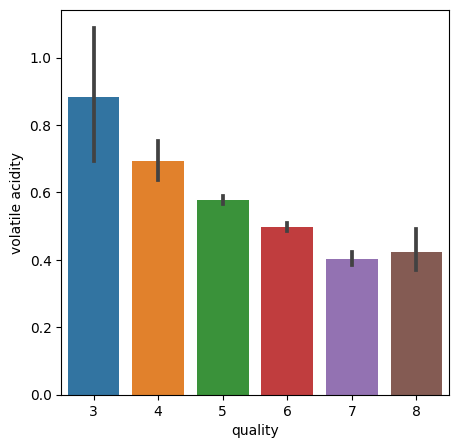

In [4]:
plot = plt.figure(figsize=(5,5))
sns.barplot(x='quality', y='volatile acidity', data= red_wine_dataset)

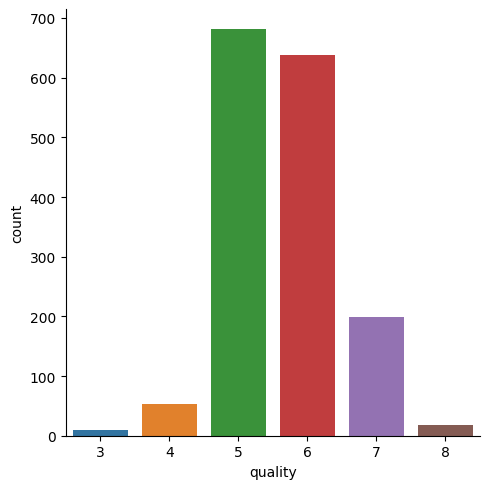

In [5]:
sns.catplot(x = 'quality', data= red_wine_dataset, kind='count')

In [6]:
correlation = red_wine_dataset.corr()

<AxesSubplot: >

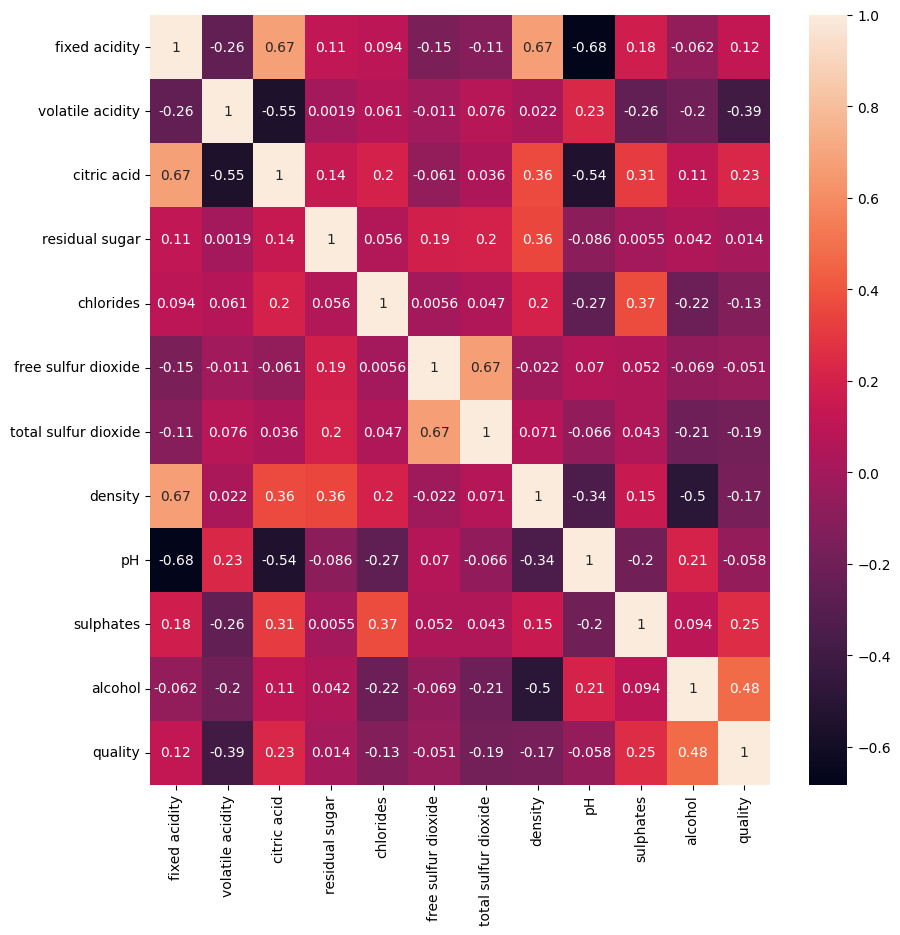

In [7]:
plt.figure(figsize=(10,10))
sns.heatmap(correlation, annot= True)

In [8]:
X = red_wine_dataset.drop('quality', axis=1)

In [9]:
print(X)

      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
1594            6.2             0.600         0.08             2.0      0.090   
1595            5.9             0.550         0.10             2.2      0.062   
1596            6.3             0.510         0.13             2.3      0.076   
1597            5.9             0.645         0.12             2.0      0.075   
1598            6.0             0.310         0.47             3.6      0.067   

      free sulfur dioxide  

In [10]:
Y = red_wine_dataset['quality'].apply(lambda y_value: 1 if y_value>=7 else 0)

In [11]:
print(Y)

0       0
1       0
2       0
3       0
4       0
       ..
1594    0
1595    0
1596    0
1597    0
1598    0
Name: quality, Length: 1599, dtype: int64


In [12]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [13]:
print(Y.shape, Y_train.shape, Y_test.shape)

(1599,) (1279,) (320,)


In [14]:
model = RandomForestClassifier()

In [15]:
model.fit(X_train, Y_train);

In [16]:
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

In [17]:
print('Accuracy : ', test_data_accuracy)

Accuracy :  0.925


In [18]:
input_data = (7.6,0.39,0.31,2.3,0.082,23,71,0.9982,3.52,0.65,9.7)
input_data_as_numpy_array = np.asarray(input_data)
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)
prediction = model.predict(input_data_reshaped)
print(prediction)
if(prediction[0]==1):
    print('Good Quality Red Wine')
else:
    print('Bad Quality Red Wine')

[0]
Bad Quality Red Wine


c:\Users\Somar\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [19]:
filename = 'model.sav'
pickle.dump(model, open(filename, 'wb'))

In [20]:
loaded_model = pickle.load(open(filename, 'rb'))
loaded_model.score(X_test, Y_test) * 100

92.5